# Data Exploration
More important than throwing a classification solution such as SVM, Logistic Regression, Decision Tree, Boosting, or Deep Learning classifier to a problem is understanding the problem itself. In this section we try to get as much understanding possible from each feature. We try to have an understanding of patterns, domain ranges, possible values, etc.

In [1]:
%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt

In [125]:
from pandas import DataFrame
df = DataFrame.from_csv("/home/morteza/Downloads/airbnb/takehome/TH_data_challenge.tsv", 
                        sep="\t", index_col=None, parse_dates = True)

# Features Visualization
List all feature names and how each feature is distributed in the dataset.

In [3]:
print("Dataset size:" + str(df.shape))
print
print(list(df.columns.values))

Dataset size:(184279, 46)

['dim_is_requested', 'ds_night', 'ds', 'id_listing_anon', 'id_user_anon', 'm_effective_daily_price', 'm_pricing_cleaning_fee', 'dim_market', 'dim_lat', 'dim_lng', 'dim_room_type', 'dim_person_capacity', 'dim_is_instant_bookable', 'm_checkouts', 'm_reviews', 'days_since_last_booking', 'cancel_policy', 'image_quality_score', 'm_total_overall_rating', 'm_professional_pictures', 'dim_has_wireless_internet', 'ds_night_day_of_week', 'ds_night_day_of_year', 'ds_checkin_gap', 'ds_checkout_gap', 'occ_occupancy_plus_minus_7_ds_night', 'occ_occupancy_plus_minus_14_ds_night', 'occ_occupancy_trailing_90_ds', 'm_minimum_nights', 'm_maximum_nights', 'price_booked_most_recent', 'p2_p3_click_through_score', 'p3_inquiry_score', 'listing_m_listing_views_2_6_ds_night_decay', 'general_market_m_unique_searchers_0_6_ds_night', 'general_market_m_contacts_0_6_ds_night', 'general_market_m_reservation_requests_0_6_ds_night', 'general_market_m_is_booked_0_6_ds_night', 'm_available_listi

In [127]:
def featureInfo(df, featureName, hist = False, binsCount=2, log_hist = True, log_hist_binsCount=2):
    print(' min ' + str(df[[featureName]].min()))
    print(' max ' + str(df[[featureName]].max()))
    if hist:
        df.hist(column=featureName, bins=binsCount)
    
        if log_hist:
            fig, ax = plt.subplots()
            df.hist(ax=ax,column=featureName,  bins=log_hist_binsCount, bottom=0.1, )
            plt.title('Histogram at Logarithmic Scale')
            ax.set_yscale('log')

def stringFeatureInfo(df, featureName, hist = True, binsCount=2, log_hist = True, log_hist_binsCount=2):
    id_user_anon_column = df[[featureName]]
    ab = id_user_anon_column.groupby(featureName).size().nlargest(10).reset_index(name='count')   #. count()#.reset_index()

    print('Top 10')
    print(ab)

    if hist:
        id_user_anon_size = df.groupby(featureName).size()
        id_user_anon_size.hist(bins=binsCount)

        if log_hist:
            fig, ax = plt.subplots()
            ab.hist(ax=ax,column='count',  bins=log_hist_binsCount, bottom=0.1, )
            plt.title('Histogram at Logarithmic Scale')
            ax.set_yscale('log')
            #grid(True)
            #grid(True, which='minor')


# In this section we study each feature by category
## Nightly Features 
    - dim_is_requested: True if ds_night receives a booking request eventually; false otherwise.
    - ds_night: The night on the calendar
    - ds: The date stamp on which data is collected
    - id_listing_anon: Anonymized listing ID
    - id_user_anon: Anonymized user ID of the host of the listing
    - m_effective_daily_price: Effective daily price on listing calendar in USD
    - m_pricing_cleaning_fee: Cleaning fee in USD.

**dim_is_requested:** 
True if ds_night receives a booking request eventually; false otherwise.

You can see that negative class happens nearly twice as the positive class. As this is the ultimate label we would like to predict, we should consider having *weights* for pos/neg classes proportionately.

 min dim_is_requested    False
dtype: bool
 max dim_is_requested    True
dtype: bool


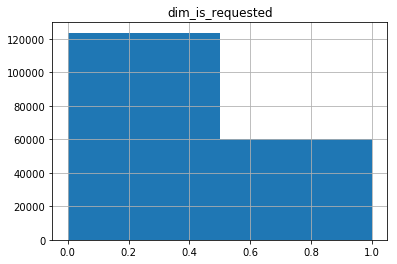

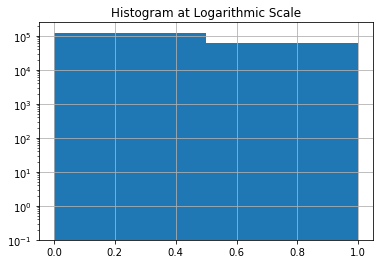

In [43]:
featureInfo(df, 'dim_is_requested', hist=True)

**ds_night**
The night on the calendar

View the timing range

In [44]:
featureInfo(df, 'ds_night')

 min ds_night    2015-01-01
dtype: object
 max ds_night    2015-12-30
dtype: object


**ds**
The date stamp on which data is collected


In [45]:
featureInfo(df, 'ds')

 min ds    2014-12-02
dtype: object
 max ds    2015-11-30
dtype: object


**id_listing_anon** Anonymized listing ID vs how many times each appears.

You can see the number of times listings appear has an smooth exponential distribution

Top 10
                        id_listing_anon  count
0  3496c5b5-1589-4d72-8684-c09ad70936b0     94
1  fd069531-9293-459c-a877-54176200182c     90
2  51b603c9-f3ec-40c0-a7a4-f5efeaada0d3     87
3  8a6f00ed-34ee-4fa4-98cb-6cb45c14237e     87
4  955aaf12-9ede-41d8-98bf-4eb37f54b6e3     86
5  ccf0e9f6-48d8-4605-a9bc-a291e7df7482     86
6  703e7a8f-a04b-4f7d-a257-23c06b2f4e93     85
7  949b8883-0daa-4753-bd83-b9b5d59631ba     85
8  ed7e3584-5322-4f5e-94a0-3d5e917f9eb0     85
9  167a84bc-6a6e-4397-87f1-517e167411bc     84


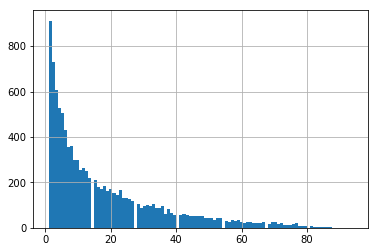

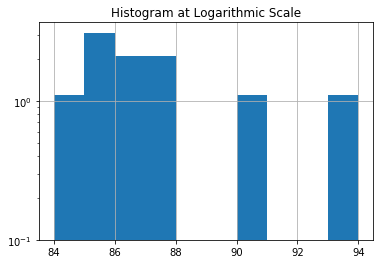

In [139]:
stringFeatureInfo(df, 'id_listing_anon', binsCount=100, log_hist_binsCount= 10)

**id_user_anon** Anonymized user ID of the host of the listing vs how many times each has hosted in the dataset.

The manjority of the hosts have <10 occurences

Top 10
                           id_user_anon  count
0  3808edfe-6b3b-4317-b6eb-9ef0c894c0b2   1878
1  890660cf-18cd-4f5b-a90a-80059fe8d550    868
2  d7ff71d6-dd54-4906-b9b8-1fbb475e874e    785
3  f7c9f358-e8d4-428c-9e59-6f8d513b4754    743
4  663dece9-0618-405c-a2bf-bef6005a40b1    673
5  78a46a22-c320-46f3-8810-34812a662896    666
6  c16399a8-4b9f-4d90-a13f-e83e33c069ef    614
7  bae4027d-ec59-47b9-9fb1-c80e27985d3a    610
8  d5ccff5c-2846-4cfd-bd0d-eb11e6d2e9ce    567
9  8214c919-070e-469e-9317-7cb97c41624c    566


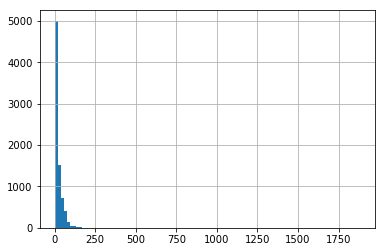

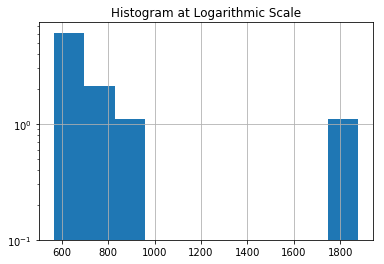

In [138]:
stringFeatureInfo(df, 'id_user_anon', binsCount=100, log_hist_binsCount= 10)

# TODO compare using this as continuous variable vs categorical with custom binnings.

**m_pricing_cleaning_fee** The night on the calendar

 min m_pricing_cleaning_fee    0.0
dtype: float64
 max m_pricing_cleaning_fee    800.0
dtype: float64


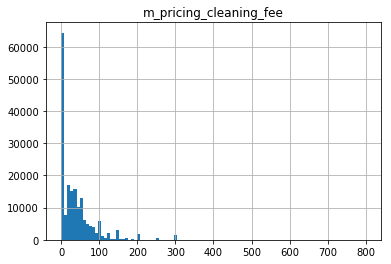

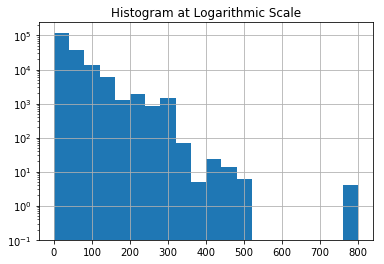

In [47]:
featureInfo(df, 'm_pricing_cleaning_fee', hist=True, binsCount=100, log_hist_binsCount= 20)

## Listing Features
	- dim_market	Market of the listing.
	- dim_lat	Latitude of the listing.
	- dim_lng	Longitude of the listing.
	- dim_room_type	The type of room (Shared room, Private room or Entire home/apt).
	- dim_person_capacity	Number of people the listings can accomadate
	- dim_is_instant_bookable	1 if the listing is instant bookable, 0 otherwise.
	- m_checkouts	Total number of checkouts
	- m_reviews	Total number of reviews
	- days_since_last_booking	Number of days since last booking
	- cancel_policy	Cancellation policy for the listing, coded in integers from 3 to 9
	- image_quality_score	A score for the image quality
	- m_total_overall_rating	Number of overall ratings left by guests
	- m_professional_pictures	Number of professional pictures taken
	- dim_has_wireless_internet	1 if the listing has wifi, 0 otherwise.
    
*Are these features unique for a listing?* from an initial observation, they look fairly stationary features and can be used to construct a dense embedding for each listing.

**dim_market** Market of the listing.

There are 3 markets in this dataset (Paris, Los Angeles, San Francisco) with majority of them being in Paris.

In [48]:
stringFeatureInfo(df, 'dim_market', hist=False)

Top 10
      dim_market   count
0          Paris  113704
1    Los Angeles   52698
2  San Francisco   17877


**Latitude/Longitude** TODO: Visualize lat/lon and identify neighborhoods.

**dim_room_type** The type of room (Shared room, Private room or Entire home/apt).

This feature is categorical with 3 options. Most of the listings are *Entire home/apt*. To make sure that the model in not biased towards popular listing types we might have to consider upsampling less popular ones or downsampling the dominant class.

In [49]:
stringFeatureInfo(df, 'dim_room_type', hist=False)

Top 10
     dim_room_type   count
0  Entire home/apt  129885
1     Private room   47546
2      Shared room    6848


**dim_person_capacity** Number of people the listings can accomadate

Since the options for this feature are fairly limited we can explore the performance of 
this feature as not as a continuous feature but as a categorical feature (one-hot) with proper binning.

 min dim_person_capacity    1
dtype: int64
 max dim_person_capacity    16
dtype: int64


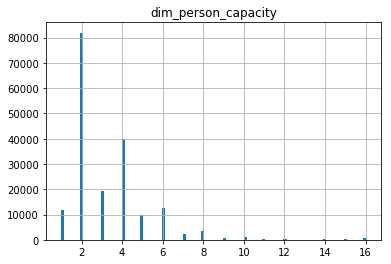

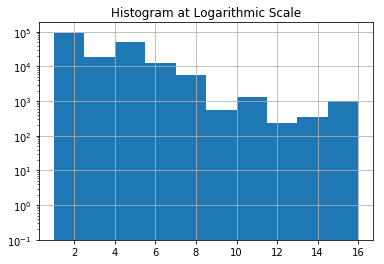

In [50]:
featureInfo(df, 'dim_person_capacity', hist=True, binsCount=100, log_hist_binsCount=10)

**dim_is_instant_bookable** Is this listing instantly bookable?

instantly bookable listings are orders of magnitude more than the ones that are not instantly bookable. This could be an important feature in the ultimate bookability of a listing. This biased should be addressed using sampling or weighting mechanisms.

 min dim_is_instant_bookable    False
dtype: bool
 max dim_is_instant_bookable    True
dtype: bool


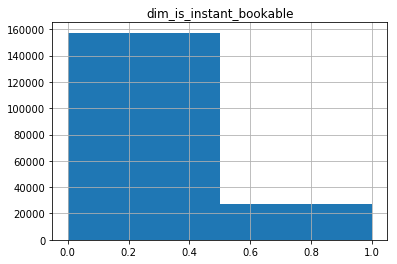

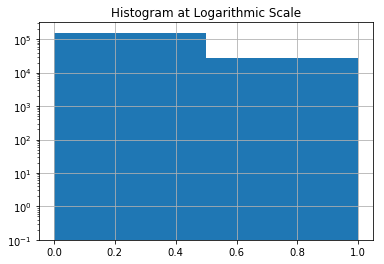

In [51]:
featureInfo(df, 'dim_is_instant_bookable', hist=True, binsCount=2, log_hist_binsCount=2)

**m_checkouts** Total number of checkouts for listing.

This feature follows a steep exponential distribution with a very long tail. 
You can see that a big majority of the listings are *never* booked! or booked less than 100 times. 
To make airbnb a thriving and successful business, we have to shift this distribution. 

This some thing that can be done using proper machine learning work by identifying causalities and 
focusing on strong points of each listing instead of blindly just promoting popular units. 
Not getting enough exposure can lead to dissatisfaction of majority of the hosts.

 min m_checkouts    0.0
dtype: float64
 max m_checkouts    432.0
dtype: float64


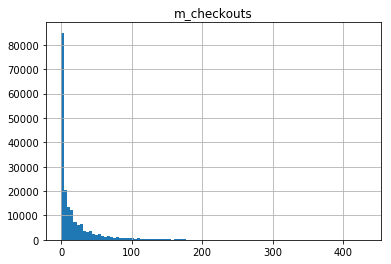

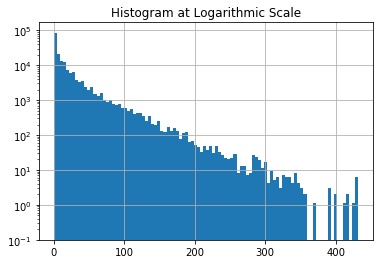

In [52]:
featureInfo(df, 'm_checkouts', hist=True, binsCount=100, log_hist_binsCount=100)


**m_reviews** Total number of reviews

This is also a very skewed feature and probably matches much more reviews for popular units and much less reviews for others.

 min m_reviews    0.0
dtype: float64
 max m_reviews    280.0
dtype: float64


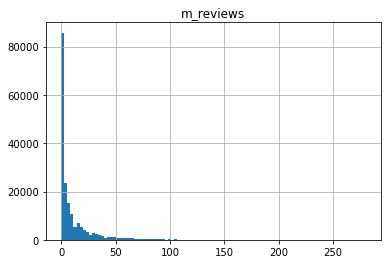

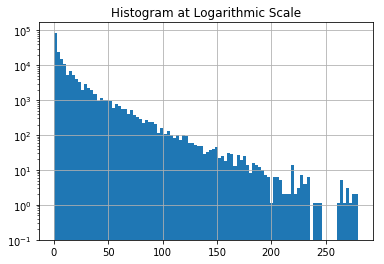

In [53]:
featureInfo(df, 'm_reviews', hist=True, binsCount=100, log_hist_binsCount=100)

**days_since_last_booking** Number of days since last booking

This aligns well with *popular* listing theorem mentioned before. 

A proper study of these popular units is necessary. We don't want our model to be 
biased towards popular units and perform poorly on unpopular ones.

 min days_since_last_booking    0.0
dtype: float64
 max days_since_last_booking    1041.0
dtype: float64


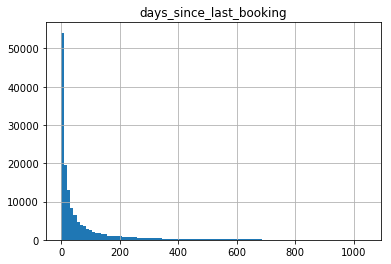

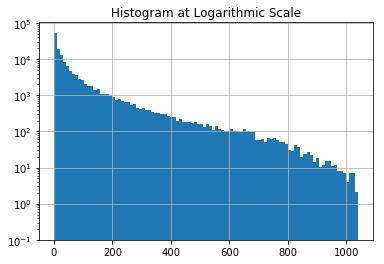

In [54]:
featureInfo(df, 'days_since_last_booking', hist=True, binsCount=100, log_hist_binsCount=100)

**cancel_policy** highly exponentially skewed

 min cancel_policy    3
dtype: int64
 max cancel_policy    8
dtype: int64


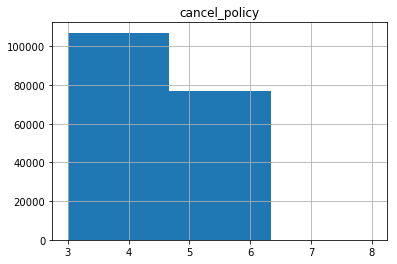

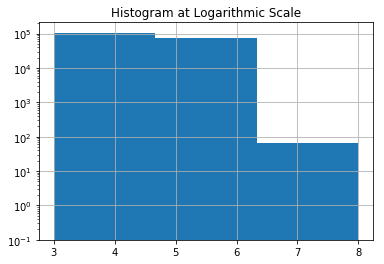

In [55]:
featureInfo(df, 'cancel_policy', hist=True, binsCount=3, log_hist_binsCount=3)

**image_quality_score** has a fairly smooth exponential dist

 min image_quality_score    0.0
dtype: float64
 max image_quality_score    0.999996
dtype: float64


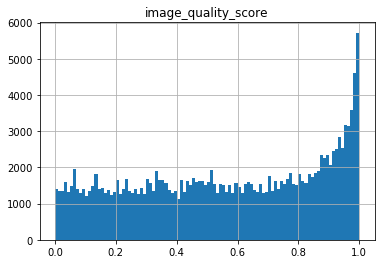

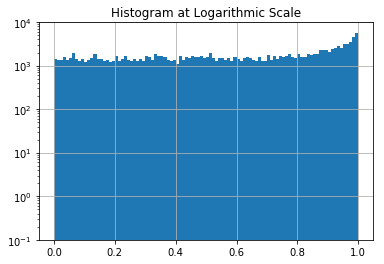

In [59]:
featureInfo(df, 'image_quality_score', hist=True, binsCount=100, log_hist_binsCount=100)

**m_total_overall_rating** Number of overall ratings left by guests

Follows the popular unit analogy.

 min m_total_overall_rating    0.0
dtype: float64
 max m_total_overall_rating    1313.0
dtype: float64


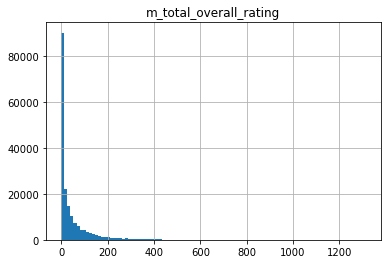

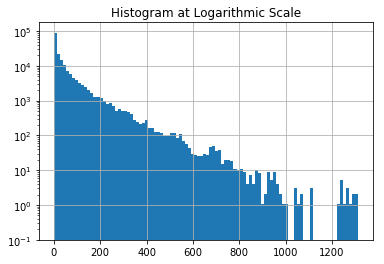

In [62]:
featureInfo(df, 'm_total_overall_rating', hist=True, binsCount=100, log_hist_binsCount=100)

**m_professional_pictures**

It's interesting to see that most of the listing don't even have pictures. 
This could be a reason on why most units don't get reservations or reviews!

I'm also curious to see a cross-correlational distribution of some of these features together.

 min m_professional_pictures    0.0
dtype: float64
 max m_professional_pictures    80.0
dtype: float64


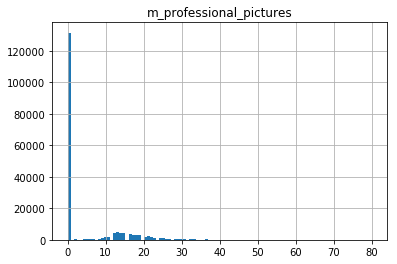

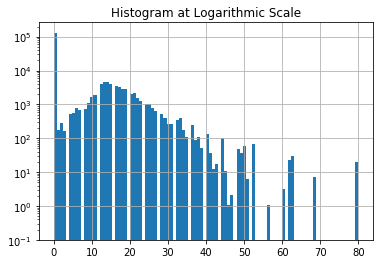

In [64]:
featureInfo(df, 'm_professional_pictures', hist=True, binsCount=100, log_hist_binsCount=100)

# Occupancy/availability
	- ds_night_day_of_week	0 is Sunday
	- ds_night_day_of_year	1 is January 1
	- ds_checkin_gap	Number of days available prior to ds_night, can be 0, 1, … to 6
	- ds_checkout_gap	Number of days available post to ds_night, can be 0, 1, … to 6
	- occ_occupancy_plus_minus_7_ds_night	Occupancy rate* around the ds_night for +/-7 days. *: Occupancy = Booked/(Booked + Available)
	- occ_occupancy_plus_minus_14_ds_night	Occupancy rate around the ds_night for +/-14 days. 
	- occ_occupancy_trailing_90_ds	Occupancy rate in the past 90 days prior to ds (included)
	- m_minimum_nights	Minimum nights required for requesting to book that ds_night
	- m_maximum_nights	Maximum nights to request book that ds_night

**ds_night_day_of_week**

This feature's value doesn't have an impact on the distribution and can probably safely be removed to save some computation time. Further analysis is needed to see if there are meaningful correlations to other features. 

 min ds_night_day_of_week    0
dtype: int64
 max ds_night_day_of_week    6
dtype: int64


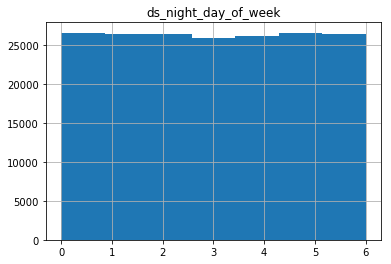

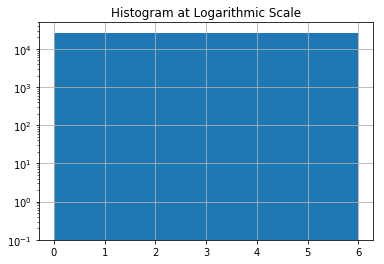

In [66]:
featureInfo(df, 'ds_night_day_of_week', hist=True, binsCount=7, log_hist_binsCount=7)

**ds_night_day_of_year**

We can see spikes, they are probably weekend indicators which get an order of magnitude more bookings. Interestingly around May/June seems to be the less booking going on. That could be because of end of school year preparations.

 min ds_night_day_of_year    1
dtype: int64
 max ds_night_day_of_year    364
dtype: int64


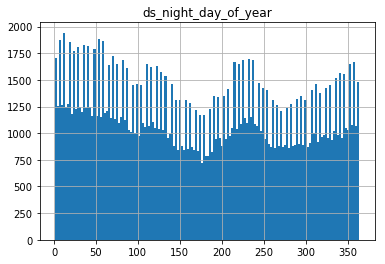

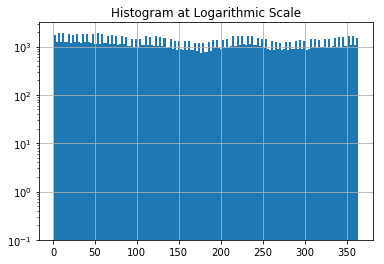

In [69]:
featureInfo(df, 'ds_night_day_of_year', hist=True, binsCount=150, log_hist_binsCount=150)

**ds_checkin_gap** Number of days available prior to ds_night, can be 0, 1, … to 6

From what it looks like, units get bookings on a weekly basis.

 min ds_checkin_gap    0.0
dtype: float64
 max ds_checkin_gap    7.0
dtype: float64


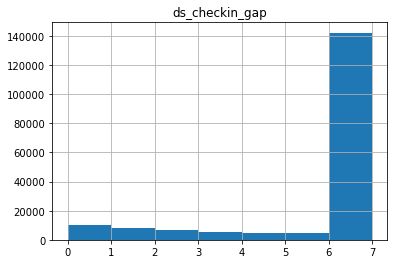

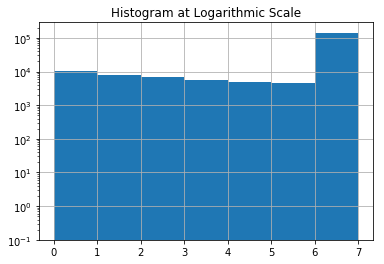

In [71]:
featureInfo(df, 'ds_checkin_gap', hist=True, binsCount=7, log_hist_binsCount=7)

**ds_checkout_gap** Number of days available post to ds_night, can be 0, 1, … to 6

 min ds_checkout_gap    0.0
dtype: float64
 max ds_checkout_gap    7.0
dtype: float64


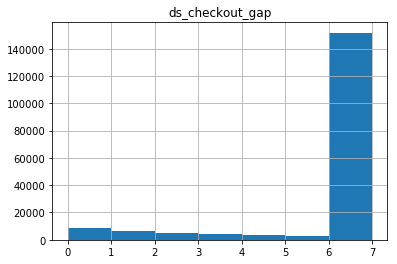

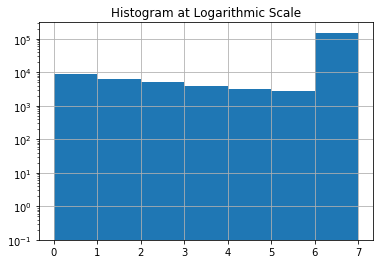

In [72]:
featureInfo(df, 'ds_checkout_gap', hist=True, binsCount=7, log_hist_binsCount=7)

**occ_occupancy_plus_minus_7_ds_night** Occupancy rate* around the ds_night for +/-7 days. *: Occupancy = Booked/(Booked + Available)

This is an interesting metric. not sure if I have clear understanding of it.



 min occ_occupancy_plus_minus_7_ds_night    0.0
dtype: float64
 max occ_occupancy_plus_minus_7_ds_night    1.0
dtype: float64


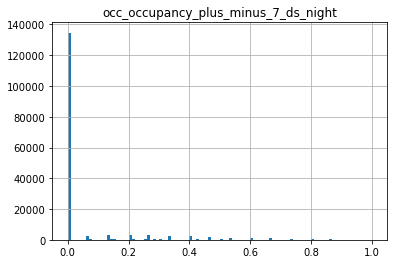

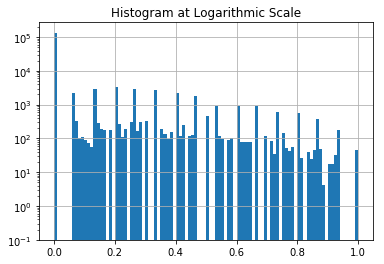

In [74]:
print('\n')

featureInfo(df, 'occ_occupancy_plus_minus_7_ds_night', hist=True, binsCount=100, log_hist_binsCount=100)

**occ_occupancy_plus_minus_14_ds_night** Occupancy rate around the ds_night for +/-14 days. 

 min occ_occupancy_plus_minus_14_ds_night    0.0
dtype: float64
 max occ_occupancy_plus_minus_14_ds_night    1.0
dtype: float64


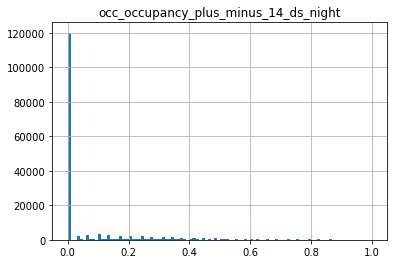

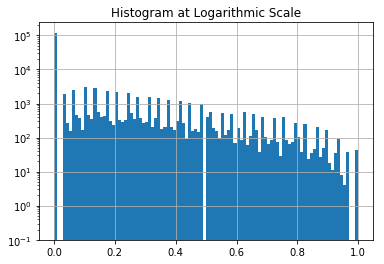

In [77]:
featureInfo(df, 'occ_occupancy_plus_minus_14_ds_night', hist=True, binsCount=100, log_hist_binsCount=100)

In [ ]:
**occ_occupancy_trailing_90_ds** Occupancy rate in the past 90 days prior to ds (included)

 min occ_occupancy_trailing_90_ds    0.0
dtype: float64
 max occ_occupancy_trailing_90_ds    1.0
dtype: float64


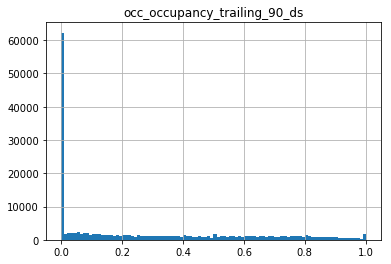

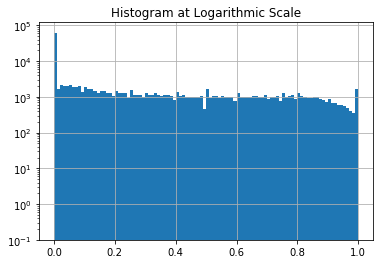

In [78]:
featureInfo(df, 'occ_occupancy_trailing_90_ds', hist=True, binsCount=100, log_hist_binsCount=100)

**m_minimum_nights** Minimum nights required for requesting to book that ds_night

To have a proper model, we can probbaly safely remove listings with minimum nist more than 10 days. Or have a separate model for longer occupancy units. Since they don't follow normal short-term booking characteristics, we probaly perform poorly on them anyways.

 min m_minimum_nights    1.0
dtype: float64
 max m_minimum_nights    1000.0
dtype: float64


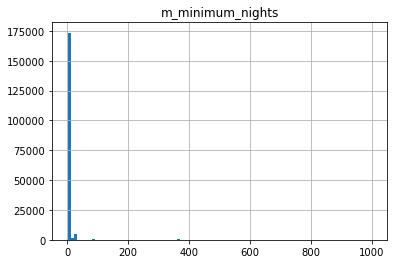

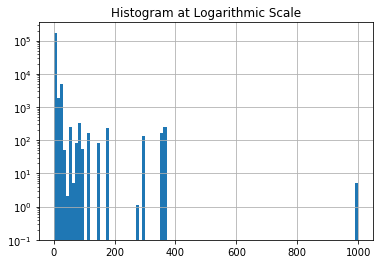

In [81]:
featureInfo(df, 'm_minimum_nights', hist=True, binsCount=100, log_hist_binsCount=100)

**m_maximum_nights** Maximum nights to request book that ds_night

Something seems to be very off here. *max m_maximum_nights 2.147484e+09*?!! Maybe need a good data cleanup?



 min m_maximum_nights    1.0
dtype: float64
 max m_maximum_nights    2.147484e+09
dtype: float64


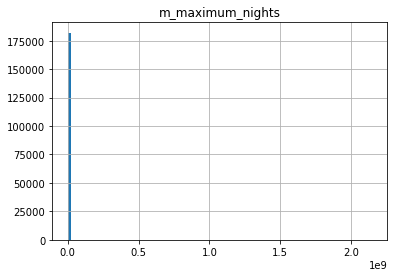

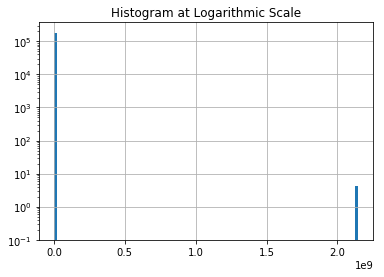

In [84]:
print('\n')

featureInfo(df, 'm_maximum_nights', hist=True, binsCount=100, log_hist_binsCount=100)

# Listing demand 
    - price_booked_most_recent	Daily price in USD in the most recent booking
	- p2_p3_click_through_score	Historical frequency of clicking on a particular listing from search results.
	- p3_inquiry_score	Represents historical frequency of someone contacting the listing from the listing page.
	- listing_m_listing_views_2_6_ds_night_decay	Average listing views in the past 2 days to 6 before ds with decay weights for the ds_night

**price_booked_most_recent** Daily price in USD in the most recent booking

There are various patterns in different price ranges. If this can help revenue for Airbnb might be worth it to have a better understanding of this feature versus bookability or other metrics.

 min price_booked_most_recent    0.0
dtype: float64
 max price_booked_most_recent    4999.0
dtype: float64


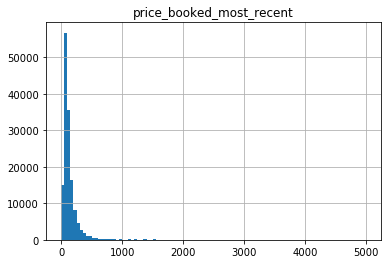

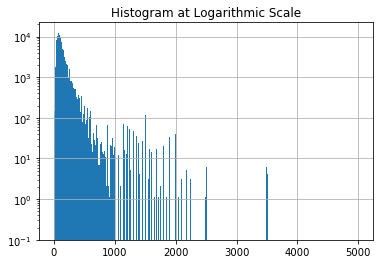

In [88]:
featureInfo(df, 'price_booked_most_recent', hist=True, binsCount=100, log_hist_binsCount=500)

**p2_p3_click_through_score** Historical frequency of clicking on a particular listing from search results.

Not sure what this means and how should be interpreted comparative to other features. This shows that click through rate for listings have a Gaussian distribution which something that is not reflected in other previous features that we studied. 

**This does not make sense.** The demands are normal but bookings are skewed highly exponentially? There is something fishy going on.

 min p2_p3_click_through_score    0.052968
dtype: float64
 max p2_p3_click_through_score    0.766491
dtype: float64


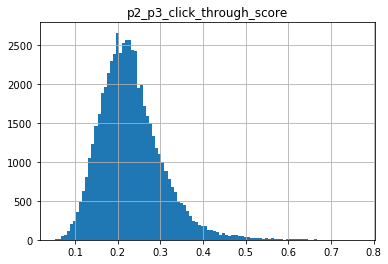

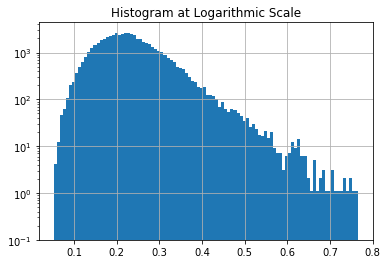

In [89]:
featureInfo(df, 'p2_p3_click_through_score', hist=True, binsCount=100, log_hist_binsCount=100)

**p3_inquiry_score** Represents historical frequency of someone contacting the listing from the listing page.

 min p3_inquiry_score    0.013492
dtype: float64
 max p3_inquiry_score    0.643529
dtype: float64


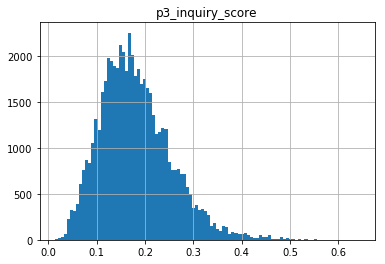

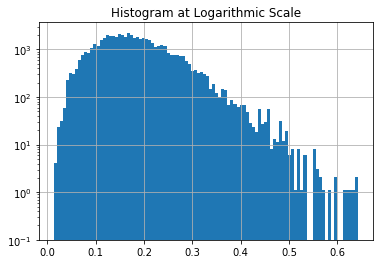

In [90]:
featureInfo(df, 'p3_inquiry_score', hist=True, binsCount=100, log_hist_binsCount=100)

**listing_m_listing_views_2_6_ds_night_decay** Average listing views in the past 2 days to 6 before ds with decay weights for the ds_night

 min listing_m_listing_views_2_6_ds_night_decay    0.0
dtype: float64
 max listing_m_listing_views_2_6_ds_night_decay    36.133333
dtype: float64


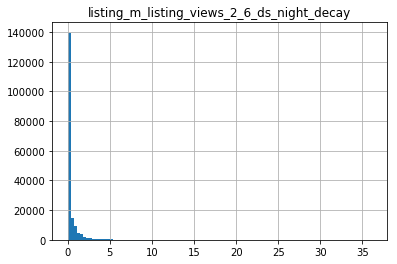

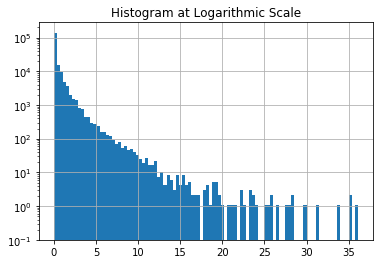

In [91]:
featureInfo(df, 'listing_m_listing_views_2_6_ds_night_decay', hist=True, binsCount=100, log_hist_binsCount=100)

# Market demand
	- general_market_m_unique_searchers_0_6_ds_night	Average number of unique searchers in the past 6 days before ds for ds_night
	- general_market_m_contacts_0_6_ds_night	Average number of unique contacts in the past 6 days before ds for ds_night
	- general_market_m_reservation_requests_0_6_ds_night	Average number of unique requests in the past 6 days before ds for ds_night
	- general_market_m_is_booked_0_6_ds_night	Avg number of booked listings in this market for the ds_night 0-6 days before ds
	- m_available_listings_ds_night	Number of available listings in this market for the ds_night- 

**general_market_m_unique_searchers_0_6_ds_night** Average number of unique searchers in the past 6 days before ds for ds_night

There are meaningful ups and downs in this feature. We need to have a better understanding of what they represent. This is entropy cleanup at its finest.

 min general_market_m_unique_searchers_0_6_ds_night    316.714286
dtype: float64
 max general_market_m_unique_searchers_0_6_ds_night    3696.714286
dtype: float64


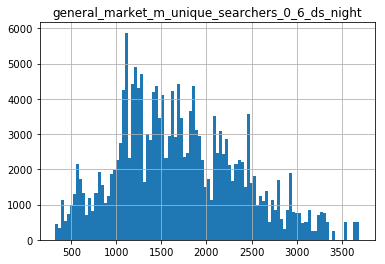

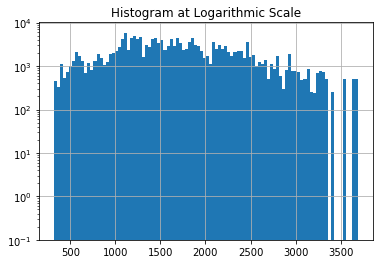

In [92]:
featureInfo(df, 'general_market_m_unique_searchers_0_6_ds_night', hist=True, binsCount=100, log_hist_binsCount=100)

**general_market_m_contacts_0_6_ds_night** Average number of unique contacts in the past 6 days before ds for ds_night

 min general_market_m_contacts_0_6_ds_night    52.0
dtype: float64
 max general_market_m_contacts_0_6_ds_night    1453.857143
dtype: float64


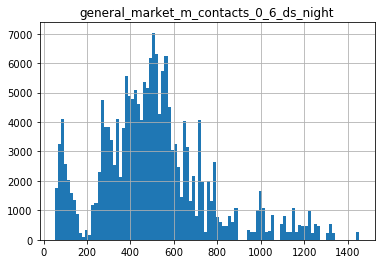

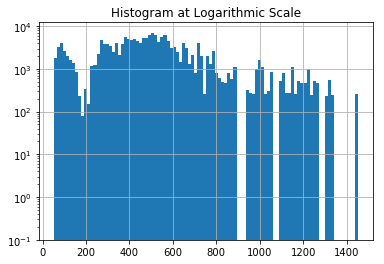

In [93]:
featureInfo(df, 'general_market_m_contacts_0_6_ds_night', hist=True, binsCount=100, log_hist_binsCount=100)

**general_market_m_reservation_requests_0_6_ds_night** Average number of unique requests in the past 6 days before ds for ds_night

 min general_market_m_reservation_requests_0_6_ds_night    13.142857
dtype: float64
 max general_market_m_reservation_requests_0_6_ds_night    271.571429
dtype: float64


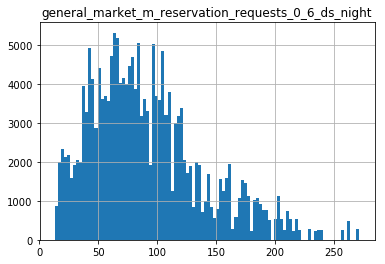

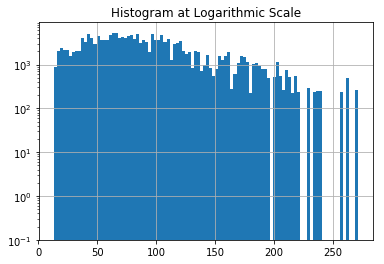

In [96]:
featureInfo(df, 'general_market_m_reservation_requests_0_6_ds_night', hist=True, binsCount=100, log_hist_binsCount=100)

**general_market_m_is_booked_0_6_ds_night** Avg number of booked listings in this market for the ds_night 0-6 days before ds

We have 3 markets but 4 distributions for average of numbe of booked listings. What does this mean? We should cleanup the data and make sure it is not bug-prone.



 min general_market_m_is_booked_0_6_ds_night    0.571429
dtype: float64
 max general_market_m_is_booked_0_6_ds_night    1.0
dtype: float64


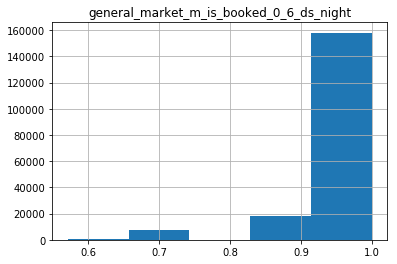

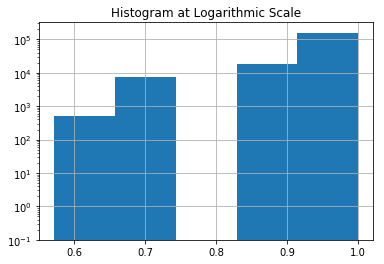

In [99]:
print('\n')

featureInfo(df, 'general_market_m_is_booked_0_6_ds_night', hist=True, binsCount=5, log_hist_binsCount=5)

**m_available_listings_ds_night** Number of available listings in this market for the ds_night.

 min m_available_listings_ds_night    1028
dtype: int64
 max m_available_listings_ds_night    37892
dtype: int64


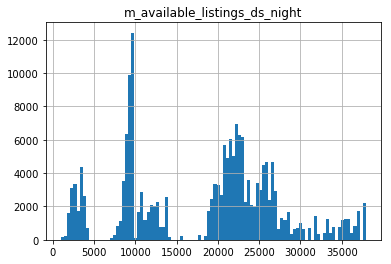

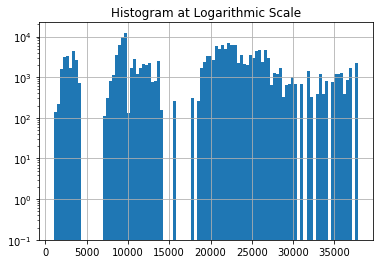

In [101]:
featureInfo(df, 'm_available_listings_ds_night', hist=True, binsCount=100, log_hist_binsCount=100)

# KDT^room_type
we use a machine learning algorithm to cluster the listings that are close geographically, as an automated way to identify neighborhoods. Each cluster identified is called a KDT (k-dimensional tree) node, which contains 100 listings.
    
    - kdt_score	A score specific for each kdt node
	- r_kdt_listing_views_0_6_avg_n100	Average of listing views within the kdt node (100 listings) and same room_type listings
	- r_kdt_n_active_n100	Number of active listings for the same room_type listings within the kdt node
	- r_kdt_n_available_n100	Number of available listings for the same room_type listings within the kdt node
	- r_kdt_m_effective_daily_price_n100_p50	The median of effective daily price for the same room_type listings within the kdt node
	- r_kdt_m_effective_daily_price_available_n100_p50	The median of effective daily price for the same room_type listings that are available within the kdt node
	- r_kdt_m_effective_daily_price_booked_n100_p50	The median of effective daily price for the same room_type listings that are booked within the kdt node

**kdt_score** A score specific for each kdt node

 min kdt_score   -1.0
dtype: float64
 max kdt_score    3.0
dtype: float64


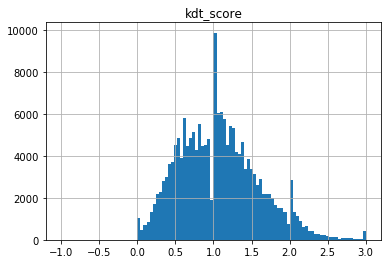

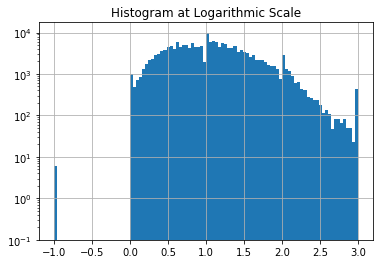

In [102]:
featureInfo(df, 'kdt_score', hist=True, binsCount=100, log_hist_binsCount=100)

**r_kdt_listing_views_0_6_avg_n100** Average of listing views within the kdt node (100 listings) and same room_type listings

 min r_kdt_listing_views_0_6_avg_n100    0.0
dtype: float64
 max r_kdt_listing_views_0_6_avg_n100    45.081633
dtype: float64


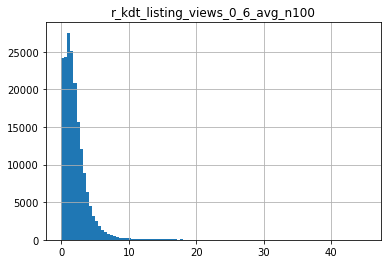

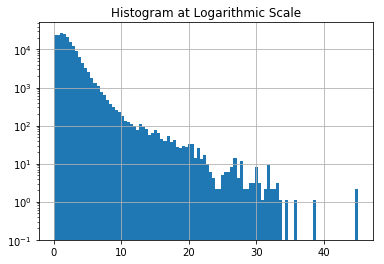

In [103]:
featureInfo(df, 'r_kdt_listing_views_0_6_avg_n100', hist=True, binsCount=100, log_hist_binsCount=100)

**r_kdt_n_active_n100** Number of active listings for the same room_type listings within the kdt node

 min r_kdt_n_active_n100    1.0
dtype: float64
 max r_kdt_n_active_n100    910.0
dtype: float64


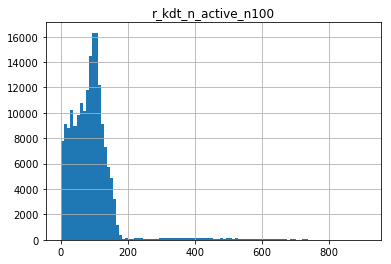

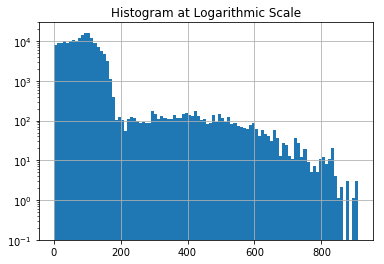

In [105]:
featureInfo(df, 'r_kdt_n_active_n100', hist=True, binsCount=100, log_hist_binsCount=100)

**r_kdt_n_available_n100** Number of available listings for the same room_type listings within the kdt node

 min r_kdt_n_available_n100    0.0
dtype: float64
 max r_kdt_n_available_n100    483.0
dtype: float64


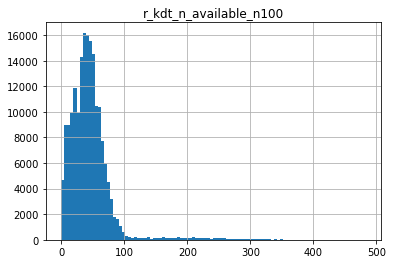

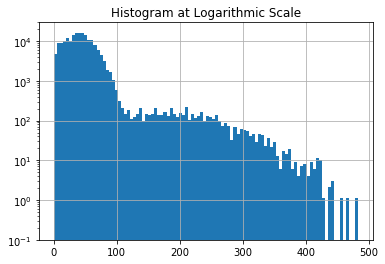

In [107]:
featureInfo(df, 'r_kdt_n_available_n100', hist=True, binsCount=100, log_hist_binsCount=100)

**r_kdt_m_effective_daily_price_n100_p50** The median of effective daily price for the same room_type listings within the kdt node

 min r_kdt_m_effective_daily_price_n100_p50    0.0
dtype: float64
 max r_kdt_m_effective_daily_price_n100_p50    1374.5
dtype: float64


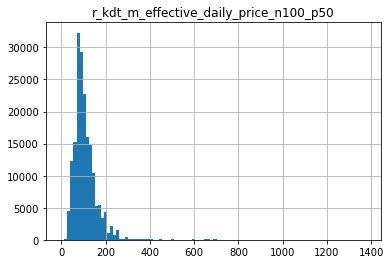

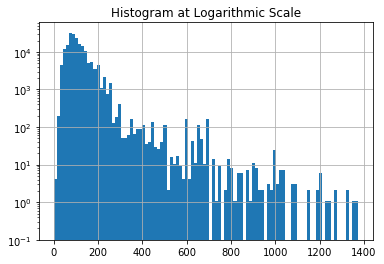

In [109]:
featureInfo(df, 'r_kdt_m_effective_daily_price_n100_p50', hist=True, binsCount=100, log_hist_binsCount=100)

**r_kdt_m_effective_daily_price_available_n100_p50** The median of effective daily price for the same room_type listings that are available within the kdt node

 min r_kdt_m_effective_daily_price_available_n100_p50    0.0
dtype: float64
 max r_kdt_m_effective_daily_price_available_n100_p50    1500.0
dtype: float64


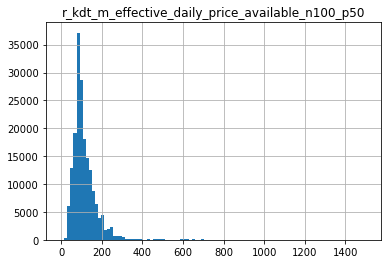

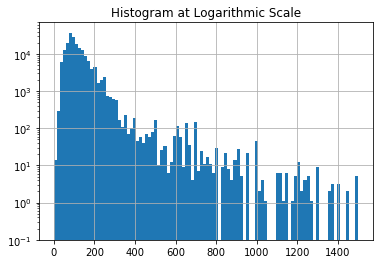

In [110]:
featureInfo(df, 'r_kdt_m_effective_daily_price_available_n100_p50', hist=True, binsCount=100, log_hist_binsCount=100)

**r_kdt_m_effective_daily_price_booked_n100_p50** The median of effective daily price for the same room_type listings that are booked within the kdt node

 min r_kdt_m_effective_daily_price_booked_n100_p50    0.0
dtype: float64
 max r_kdt_m_effective_daily_price_booked_n100_p50    1995.0
dtype: float64


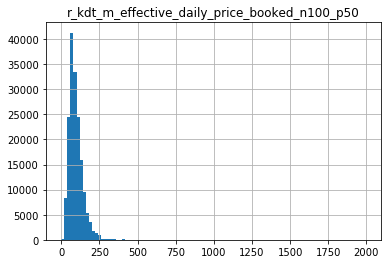

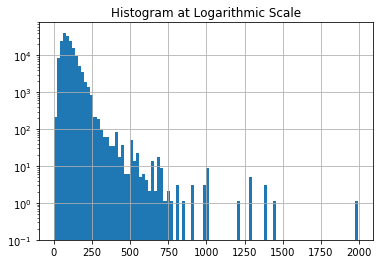

In [112]:
featureInfo(df, 'r_kdt_m_effective_daily_price_booked_n100_p50', hist=True, binsCount=100, log_hist_binsCount=100)

# Modeling
## Steps 
    1- convert data to tensor
        1- user_id and listing_id
            - Version 1: Discard 
            - Version 2: Create *user embeddings* and *listing embeddings* using paragraph embedding approach
                - Visualize embeddings using t-SNE
        2- Convert *categorical* features to set of *one-hot* features
        3- Convert numerical values to numpy matrices so they are loadable by TensorFlow
        4- Add batch normalization
    2- Shuffle and split to train/validation/test
    3- Define model
    4- Train
        1- Version 1: Simple layers of fully connected layers
        2- Version 2: Model each listing's performance and behavior as a sequence through time using LSTM to predict future behavior based on its past instead of each sample being treated as a standalone sample.
    5- Evaluation metrics and visualizations
        - PR curve
        - ROC curve
        - AUC of each of the curves above
        - F1 score
        - RCE


### Utility libraries

In [113]:
# imports 

%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split

import tensorflow as tf

### Data Manipulation

In [114]:
# load dataset

from pandas import DataFrame
df = DataFrame.from_csv("/home/morteza/Downloads/airbnb/takehome/TH_data_challenge.tsv", 
                        sep="\t", index_col=None, parse_dates = True)

df.fillna(0, inplace=True)
print('Dataset loaded.')

Dataset loaded.


In [115]:
# convert True/False to 1/0
df.dim_is_requested = df.dim_is_requested.astype(int)
df.dim_is_instant_bookable = df.dim_is_instant_bookable.astype(int)

In [116]:
# drop ids and dates for version 1 of model
# in version 2 convert ids to dense embeddings via lookuptables.

drop_columns = ['ds_night', 'ds', 'id_listing_anon', 'id_user_anon']
df.drop(drop_columns,inplace=True,axis=1)

In [117]:
# convert categorical features to one-hot
categorical_columns = ['dim_market', 'dim_room_type' ]
df = pd.get_dummies(df, columns = categorical_columns)

In [118]:
# get X and y 
label_dataframe = df.dim_is_requested
df.drop('dim_is_requested',inplace=True,axis=1) # remove label from features

input_dataframe = df

In [119]:
# Create train/test/validation splits
X_train, X_test, y_train, y_test = train_test_split(input_dataframe, label_dataframe, test_size=0.2, random_state=1)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=1)

X_train = X_train.as_matrix()
y_train = y_train.as_matrix()
y_train = np.reshape(y_train, [y_train.shape[0], 1])

X_test = X_test.as_matrix()
y_test = y_test.as_matrix()
y_test = np.reshape(y_test, [y_test.shape[0], 1])

X_val = X_val.as_matrix()
y_val = y_val.as_matrix()
y_val = np.reshape(y_val, [y_val.shape[0], 1])


FEATURE_COUNT = len(input_dataframe.columns)
print('FEATURE_COUNT: ' + str(FEATURE_COUNT))

FEATURE_COUNT: 45


### Model Definition

In [140]:
n_nodes_hl1 = 50
n_nodes_hl2 = 100
n_nodes_hl3 = 200
n_classes = 1
batch_size = 100

x = tf.placeholder('float', [None, FEATURE_COUNT])
y = tf.placeholder('float')

In [141]:
def neural_network_model(data):
    hidden_1_layer = {'weights':tf.Variable(tf.random_normal([FEATURE_COUNT, n_nodes_hl1])),
                      'biases':tf.Variable(tf.random_normal([n_nodes_hl1]))}

    hidden_2_layer = {'weights':tf.Variable(tf.random_normal([n_nodes_hl1, n_nodes_hl2])),
                      'biases':tf.Variable(tf.random_normal([n_nodes_hl2]))}

    hidden_3_layer = {'weights':tf.Variable(tf.random_normal([n_nodes_hl2, n_nodes_hl3])),
                      'biases':tf.Variable(tf.random_normal([n_nodes_hl3]))}

    output_layer = {'weights':tf.Variable(tf.random_normal([n_nodes_hl3, n_classes])),
                    'biases':tf.Variable(tf.random_normal([n_classes]))}
    
    l1 = tf.add(tf.matmul(data,hidden_1_layer['weights']), hidden_1_layer['biases'])
    l1 = tf.nn.relu(l1)

    l2 = tf.add(tf.matmul(l1,hidden_2_layer['weights']), hidden_2_layer['biases'])
    l2 = tf.nn.relu(l2)

    l3 = tf.add(tf.matmul(l2,hidden_3_layer['weights']), hidden_3_layer['biases'])
    l3 = tf.nn.relu(l3)

    output = tf.matmul(l3,output_layer['weights']) + output_layer['biases']

    return output

In [142]:
def train_neural_network(x):
    prediction = neural_network_model(x)
    cost = tf.reduce_mean( tf.nn.softmax_cross_entropy_with_logits(logits=prediction, labels=y) )
    
    optimizer = tf.train.AdamOptimizer().minimize(cost)

    hm_epochs = 10
    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        
        for epoch in range(hm_epochs):
            epoch_loss = 0
            for _ in range(int(X_train.shape[0]/batch_size)):
                n_samples = X_train.shape[0]
                indices  =  np.random.choice(n_samples,  batch_size)    
                X_batch,  y_batch  =  X_train [ indices ],  y_train [ indices]
                #print(X_batch)
                #print(y_batch)
                _, c = sess.run([optimizer, cost], feed_dict={x: X_batch, y: y_batch})
                #print(c)
                epoch_loss += c

            print('Epoch', epoch, 'completed out of',hm_epochs,'loss:',epoch_loss)

        correct = tf.equal(tf.argmax(prediction, 1), tf.argmax(y, 1))
        
        accuracy = tf.reduce_mean(tf.cast(correct, 'float'))
        print('Accuracy:',accuracy.eval({x:X_test, y:y_test}))
        #print('Accuracy:',accuracy.eval({x:mnist.test.images, y:mnist.test.labels}))

In [143]:
train_neural_network(x)

('Epoch', 0, 'completed out of', 10, 'loss:', 0.0)
('Epoch', 1, 'completed out of', 10, 'loss:', 0.0)
('Epoch', 2, 'completed out of', 10, 'loss:', 0.0)
('Epoch', 3, 'completed out of', 10, 'loss:', 0.0)
('Epoch', 4, 'completed out of', 10, 'loss:', 0.0)
('Epoch', 5, 'completed out of', 10, 'loss:', 0.0)
('Epoch', 6, 'completed out of', 10, 'loss:', 0.0)
('Epoch', 7, 'completed out of', 10, 'loss:', 0.0)
('Epoch', 8, 'completed out of', 10, 'loss:', 0.0)
('Epoch', 9, 'completed out of', 10, 'loss:', 0.0)
('Accuracy:', 1.0)
